In [195]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [196]:
df['HeartDisease'].value_counts(normalize=True) #불균형 심함

HeartDisease
No     0.914405
Yes    0.085595
Name: proportion, dtype: float64

In [197]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns

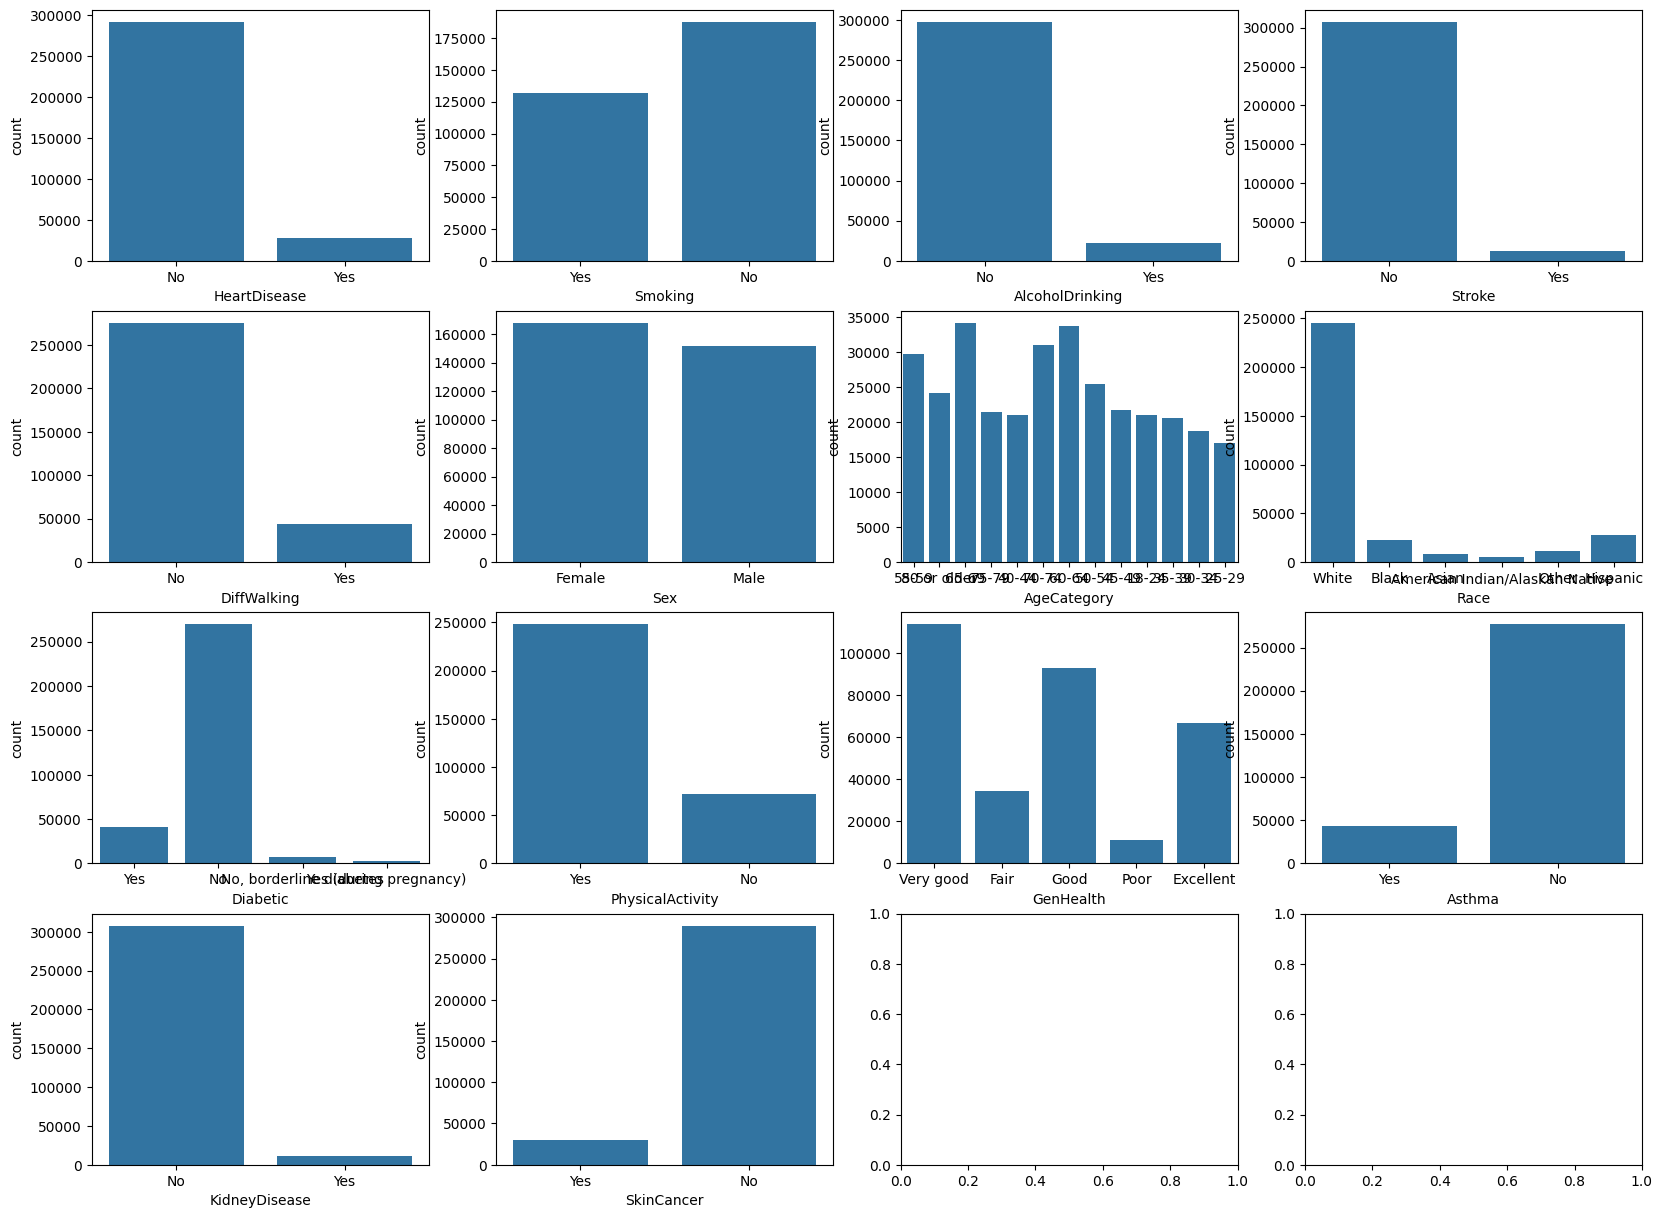

In [198]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

# 각 변수에 대한 히스토그램 그리기
for i, var in enumerate(cat_col):
    row = i // 4
    col = i % 4
    sns.countplot(data=df, x=var, ax=axes[row, col])

# 상관관계 확인
plt.show()

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [200]:
num_col

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [201]:
cat_col

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [202]:
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 0 if x == 'No' else 1)

In [203]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [204]:
# for col in num_col:
#     q1 = df[col].quantile(0.25)
#     q2 = df[col].quantile(0.5)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     condition = (df[col] > q3 + 3*iqr) | (df[col] < q1 - 3*iqr)
#     df = df[~condition]


In [205]:
# df.info()

In [206]:
cat_col = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [207]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train.shape , X_test.shape ,y_train.shape ,y_test.shape 

((255836, 17), (63959, 17), (255836,), (63959,))

In [208]:
from sklearn.preprocessing import LabelEncoder
cols = cat_col
for i in cols:
	ll = LabelEncoder()
	X_train[i] = ll.fit_transform(X_train[i])
	X_test[i] = ll.transform(X_test[i])

In [209]:
dt_clf=DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=3)
lr_clf= LogisticRegression()
model = [dt_clf,knn_clf,lr_clf]

In [210]:
X_train.shape , X_test.shape ,y_train.shape ,y_test.shape 

((255836, 17), (63959, 17), (255836,), (63959,))

In [211]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
141516,38.28,0,0,0,30.0,0.0,0,1,6,5,2,1,3,5.0,0,1,0
180314,32.61,0,0,0,7.0,0.0,1,0,12,5,0,1,1,8.0,0,0,0
274307,27.34,0,0,0,2.0,0.0,0,0,1,1,0,1,4,8.0,0,0,0
232648,23.23,1,0,0,0.0,0.0,1,0,12,5,0,1,4,8.0,1,0,0
74379,33.67,0,0,0,0.0,0.0,0,0,5,2,0,1,2,8.0,0,0,0


In [212]:
y_train.head()

141516    0
180314    0
274307    0
232648    1
74379     0
Name: HeartDisease, dtype: int64

In [213]:
from sklearn.metrics import accuracy_score 
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('일반',accuracy_score(y_test, pred))

일반 0.8626463828390062


In [214]:
#soft
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf),('DT',dt_clf)],voting = 'soft') 
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('soft',accuracy_score(y_test, pred))

soft 0.902343688925718


In [215]:
#hard
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf),('DT',dt_clf)],voting = 'hard')
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('hard',accuracy_score(y_test, pred))

hard 0.9089885708031707
